Cantidad de propina sugerida: 12.509931972789122
Cantidad de propina sugerida: 12.509931972789122


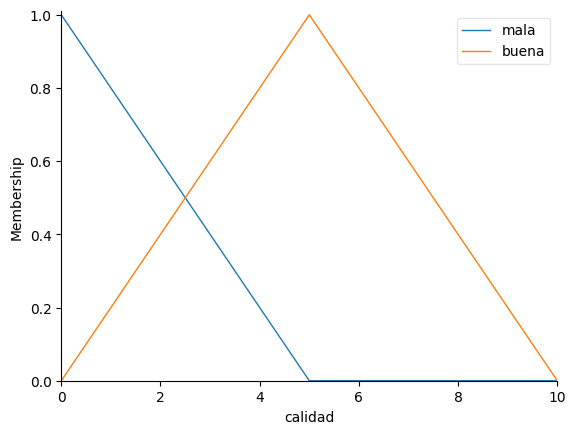

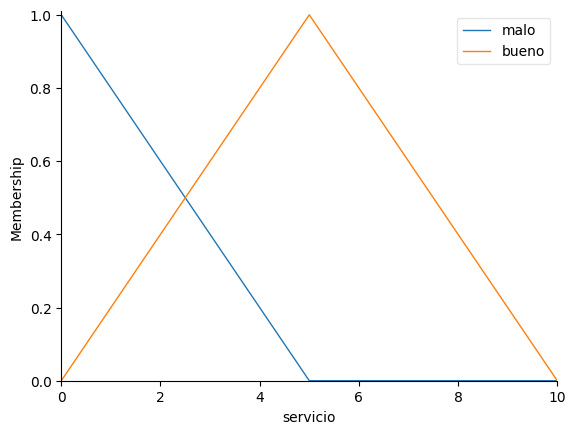

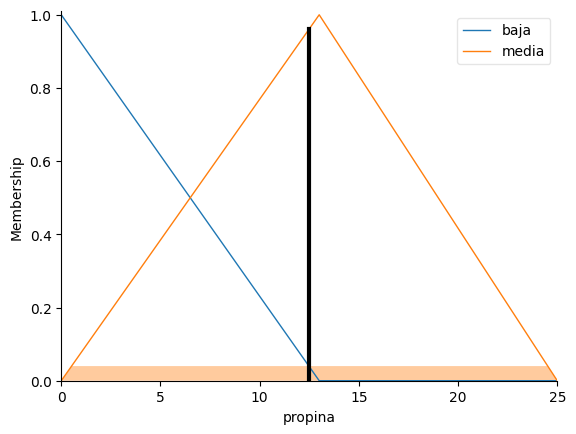

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedentes (variables de entrada)
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')

# Consecuente (variable de salida)
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

# Definir funciones de membresía para las variables de entrada y salida
calidad['mala'] = fuzz.trimf(calidad.universe, [0, 0, 5])
calidad['buena'] = fuzz.trimf(calidad.universe, [0, 5, 10])
servicio['malo'] = fuzz.trimf(servicio.universe, [0, 0, 5])
servicio['bueno'] = fuzz.trimf(servicio.universe, [0, 5, 10])
propina['baja'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['media'] = fuzz.trimf(propina.universe, [0, 13, 25])

# Reglas difusas
regla1 = ctrl.Rule(calidad['mala'] & servicio['malo'], propina['baja'])
regla2 = ctrl.Rule(servicio['bueno'], propina['media'])
regla3 = ctrl.Rule(calidad['buena'] & servicio['bueno'], propina['media'])

# Crear sistema de control difuso
sistema_propina = ctrl.ControlSystem([regla1, regla2, regla3])
simulador_propina = ctrl.ControlSystemSimulation(sistema_propina)

# Entrada del usuario (por ejemplo)
simulador_propina.input['calidad'] = 6.5
simulador_propina.input['servicio'] = 9.8

# Obtener resultado
simulador_propina.compute()
print("Cantidad de propina sugerida:", simulador_propina.output['propina'])

# Visualización de las funciones de membresía y resultado
calidad.view()
servicio.view()
propina.view(sim=simulador_propina)

# Mostrar el resultado
print("Cantidad de propina sugerida:", simulador_propina.output['propina'])
